<a href="https://colab.research.google.com/github/Kristina-Analyst/Python/blob/main/Python_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Обробка данних та загальні показники

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount ("/content/drive")
%cd /content/drive/MyDrive/MateHometask/final_project
countries = pd.read_csv("countries.csv")
product = pd.read_csv("products.csv")
event = pd.read_csv("events.csv")

event.columns = event.columns.str.lower().str.replace(" ", "_")
product = product.rename(columns = {"id" : "product_id"})
countries = countries.rename(columns = {"alpha-3" : "country_code"})
ev_prod = pd.merge(event, product, on = "product_id" )
full_df = pd.merge(ev_prod, countries, on = "country_code")
df = full_df.dropna()
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df = df.drop(columns = ["alpha-2", "sub-region"])
df["unit_price"] = pd.to_numeric(df["unit_price"], errors="coerce")
df["unit_cost"] = pd.to_numeric(df["unit_cost"], errors="coerce")
df["profit"] = df["unit_price"] - df["unit_cost"]
total_price = df["unit_price"].sum()
total_cost = df["unit_cost"].sum()
units_sold = df["units_sold"].sum()
total_profit = df["profit"].sum()
avg_price = df["unit_price"].mean()
avg_cost = df["unit_cost"].mean()
avg_sold = df["units_sold"].mean()
avg_profit = df["profit"].mean()
print(f"Total cost:{total_cost:.2f}")
print(f"Total price:{total_price:.2f}")
print(f"Total sold:{units_sold:.2f}")
print(f"Total profit:{total_profit:.2f}")
print(f"Average profit:{avg_profit:.2f}")
print(f"Average sold:{avg_sold:.2f}")
print(f"Average cost:{avg_cost:.2f}")
print(f"Average price:{avg_price:.2f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MateHometask/final_project
Total cost:232142.37
Total price:329197.42
Total sold:6171671.00
Total profit:97055.05
Average profit:77.89
Average sold:4953.19
Average cost:186.31
Average price:264.20


<ipython-input-8-8999510b29c2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")


###Графіки прибутку та кількості проданих товарів у розрізі днів тижня, місяців та років




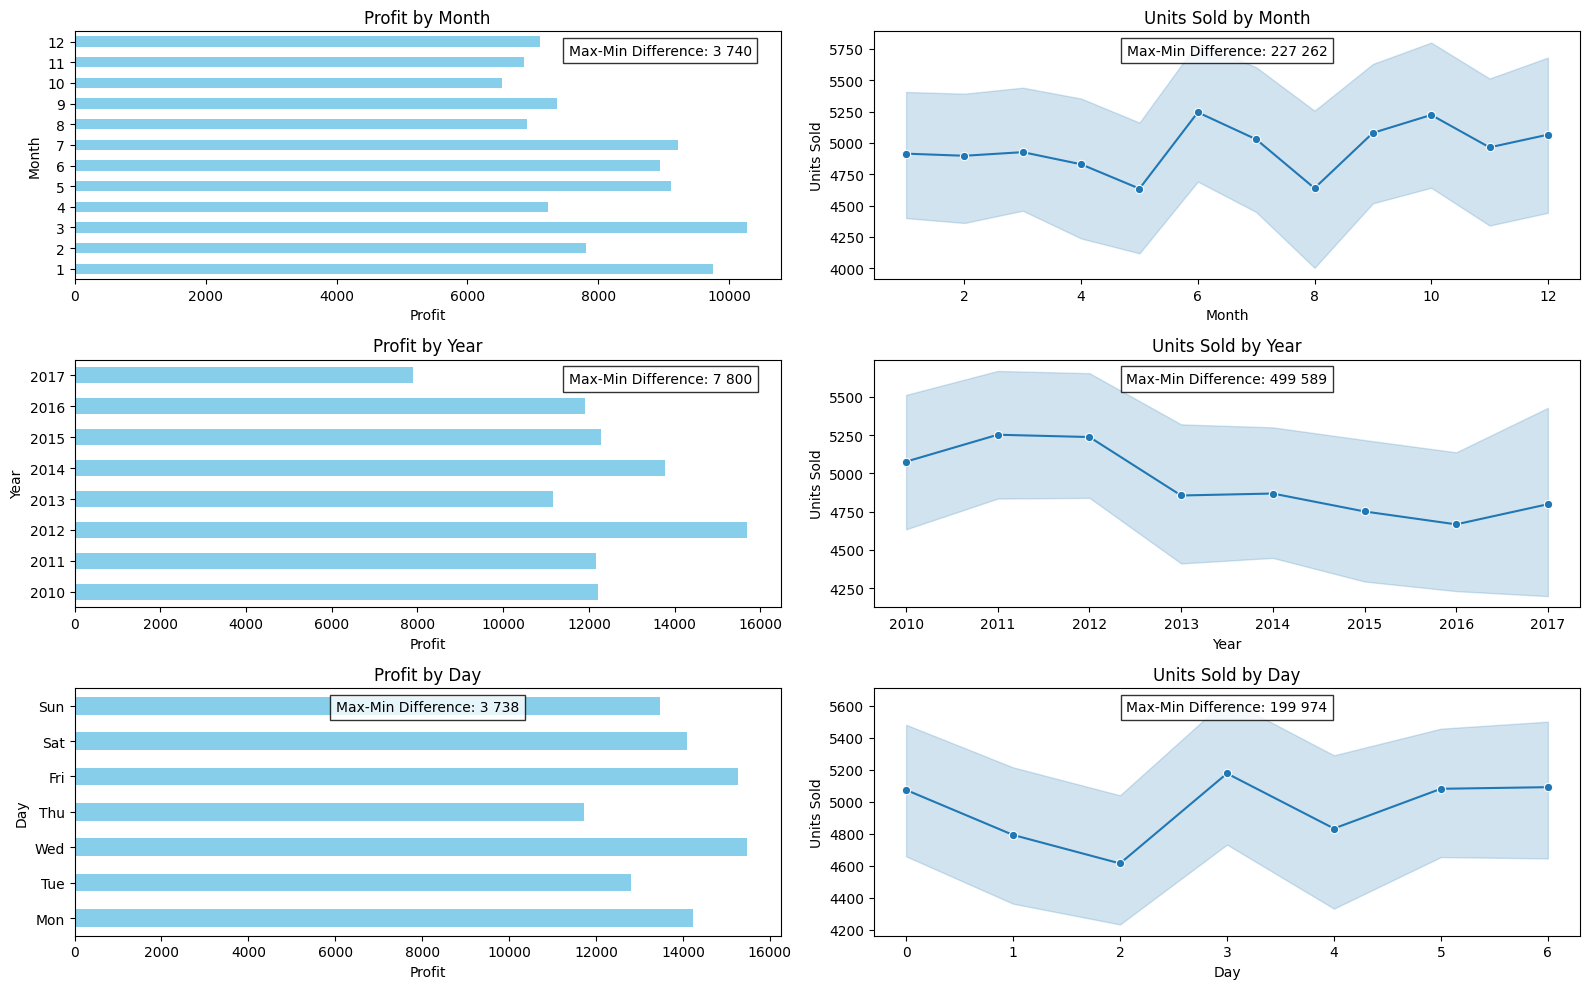

In [ ]:
df["month"] = df["order_date"].dt.month
df["year"] = df["order_date"].dt.year
df["day"] = df["order_date"].dt.dayofweek

fig, ax = plt.subplots(3, 2, figsize = (16, 10))

df.groupby("month", observed = False)["profit"].sum().plot(kind = "barh", ax = ax[0,0], color = "skyblue")
ax[0,0].set_title("Profit by Month")
ax[0,0].set_xlabel("Profit")
ax[0,0].set_ylabel("Month")

month_profit = df.groupby("month")["profit"].sum()
max_profit = month_profit.max()
min_profit = month_profit.min()
difference = max_profit - min_profit

ax[0,0].text(
    0.70, 0.95,
    f"Max-Min Difference: {difference:,.0f}".replace(",", " "),
    transform=ax[0,0].transAxes,
    fontsize=10,
    ha="left",
    va="top",
    bbox=dict(facecolor="white", alpha=0.8, edgecolor="black")
)

sns.lineplot(x="month", y="units_sold", data=df, marker = "o", ax=ax[0,1])
ax[0,1].set_title("Units Sold by Month")
ax[0,1].set_xlabel("Month")
ax[0,1].set_ylabel("Units Sold")

month_sales = df.groupby("month")["units_sold"].sum()
max_sales = month_sales.max()
min_sales = month_sales.min()
difference = max_sales - min_sales

ax[0,1].text(
    0.5, 0.95,
    f"Max-Min Difference: {difference:,.0f}".replace(",", " "),
    transform=ax[0,1].transAxes,
    fontsize=10,
    ha="center",
    va="top",
    bbox=dict(facecolor="white", alpha=0.8, edgecolor="black")
)

df.groupby("year", observed = False)["profit"].sum().plot(kind = "barh", ax = ax[1,0], color = "skyblue")
ax[1,0].set_title("Profit by Year")
ax[1,0].set_xlabel("Profit")
ax[1,0].set_ylabel("Year")

year_profit = df.groupby("year")["profit"].sum()
max_profit = year_profit.max()
min_profit = year_profit.min()
difference = max_profit - min_profit

ax[1,0].text(
    0.70, 0.95,
    f"Max-Min Difference: {difference:,.0f}".replace(",", " "),
    transform=ax[1,0].transAxes,
    fontsize=10,
    ha="left",
    va="top",
    bbox=dict(facecolor="white", alpha=0.8, edgecolor="black")
)

sns.lineplot(x="year", y="units_sold", data=df, marker = "o", ax=ax[1,1])
ax[1,1].set_title("Units Sold by Year")
ax[1,1].set_xlabel("Year")
ax[1,1].set_ylabel("Units Sold")

year_sales = df.groupby("year")["units_sold"].sum()
max_sales = year_sales.max()
min_sales = year_sales.min()
difference = max_sales - min_sales

ax[1,1].text(
    0.5, 0.95,
    f"Max-Min Difference: {difference:,.0f}".replace(",", " "),
    transform=ax[1,1].transAxes,
    fontsize=10,
    ha="center",
    va="top",
    bbox=dict(facecolor="white", alpha=0.8, edgecolor="black")
)

df.groupby("day", observed = False)["profit"].sum().plot(kind = "barh", ax = ax[2,0], color = "skyblue")
ax[2,0].set_title("Profit by Day")
ax[2,0].set_xlabel("Profit")
ax[2,0].set_ylabel("Day")
ax[2,0].set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

day_profit = df.groupby("day")["profit"].sum()
max_profit = day_profit.max()
min_profit = day_profit.min()
difference = max_profit - min_profit

ax[2,0].text(
    0.5, 0.95,
    f"Max-Min Difference: {difference:,.0f}".replace(",", " "),
    transform=ax[2,0].transAxes,
    fontsize=10,
    ha="center",
    va="top",
    bbox=dict(facecolor="white", alpha=0.8, edgecolor="black")
)

sns.lineplot(x="day", y="units_sold", data=df, marker = "o", ax=ax[2,1])
ax[2,1].set_title("Units Sold by Day")
ax[2,1].set_xlabel("Day")
ax[2,1].set_ylabel("Units Sold")
ax[2,0].set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

daily_sales = df.groupby("day")["units_sold"].sum()
max_sales = daily_sales.max()
min_sales = daily_sales.min()
difference = max_sales - min_sales

ax[2,1].text(
    0.5, 0.95,
    f"Max-Min Difference: {difference:,.0f}".replace(",", " "),
    transform=ax[2,1].transAxes,
    fontsize=10,
    ha="center",
    va="top",
    bbox=dict(facecolor="white", alpha=0.8, edgecolor="black")
)
plt.tight_layout()
plt.show()

###Графіки по категоріях товару

<ipython-input-57-4d6b60b0a25b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="item_type", y="units_sold", data=grouped_data, palette="viridis", ax=ax[0,0])
<ipython-input-57-4d6b60b0a25b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x="item_type", y="unit_price", data= df_group, palette="plasma", ax=ax[0,1])


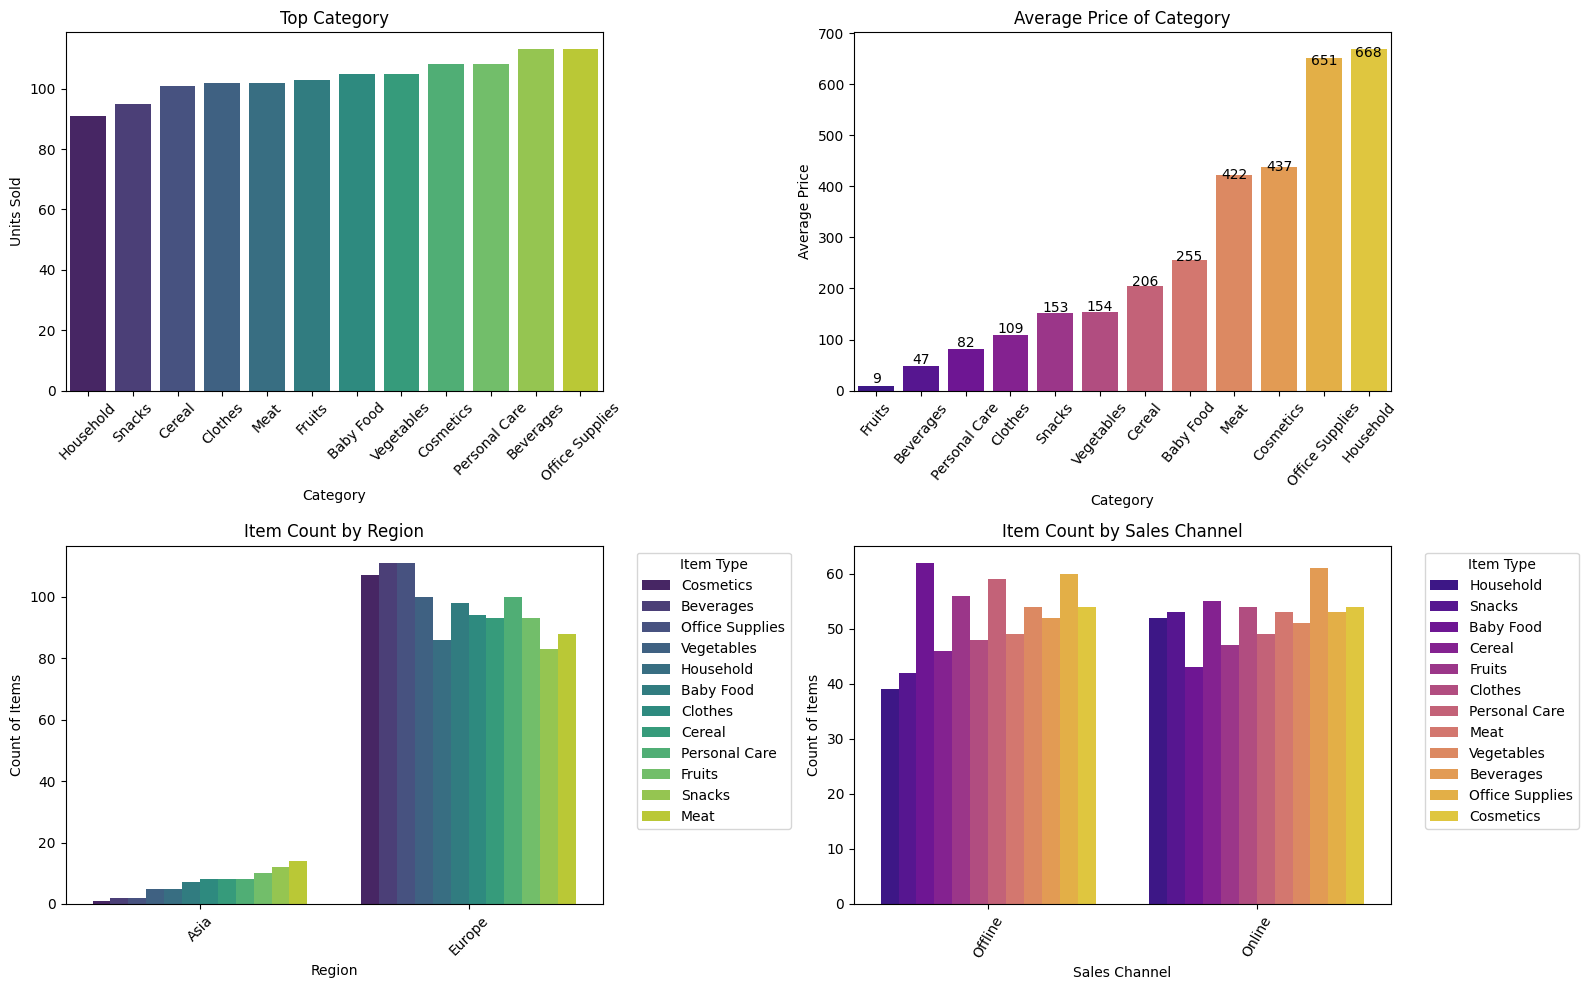

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (16, 10))

grouped_data = df.groupby("item_type", observed=False)["units_sold"].count().sort_values().reset_index()
sns.barplot(x="item_type", y="units_sold", data=grouped_data, palette="viridis", ax=ax[0,0])
ax[0,0].set_title("Top Category")
ax[0,0].set_xlabel("Category")
ax[0,0].set_ylabel("Units Sold")
ax[0,0].tick_params(axis="x", rotation=45)

df_group = df.groupby("item_type", observed=False)["unit_price"].mean().sort_values().reset_index()
bar = sns.barplot(x="item_type", y="unit_price", data= df_group, palette="plasma", ax=ax[0,1])
ax[0,1].set_title("Average Price of Category")
ax[0,1].set_xlabel("Category")
ax[0,1].set_ylabel("Average Price")
for bar in ax[0,1].patches:
    height = bar.get_height()
    if height > 0:
        formatted_height = "{:,.0f}".format(height).replace(",", " ")
        ax[0,1].text(
            bar.get_x() + bar.get_width() / 2,
            height - 0.03 * height,
            formatted_height,
            ha="center",
            va="bottom",
            color="black"
        )
ax[0,1].tick_params(axis="x", rotation=50)


stacked_data = df.groupby(["region", "item_type"], observed=False).size().sort_values().reset_index(name="count")
sns.barplot(x="region", y="count", hue="item_type", data=stacked_data, palette="viridis", ax=ax[1,0])
ax[1,0].set_title("Item Count by Region")
ax[1,0].set_xlabel("Region")
ax[1,0].set_ylabel("Count of Items")
ax[1,0].tick_params(axis="x", rotation=45)
ax[1,0].legend(title="Item Type", bbox_to_anchor=(1.05, 1), loc="upper left")

df["sales_channel"] = df["sales_channel"].str.capitalize()
stacked_data = df.groupby(["sales_channel", "item_type"], observed=False).size().sort_values().reset_index(name="count")
sns.barplot(x="sales_channel", y="count", hue="item_type", data=stacked_data, palette="plasma", ax=ax[1,1])
ax[1,1].set_title("Item Count by Sales Channel")
ax[1,1].set_xlabel("Sales Channel")
ax[1,1].set_ylabel("Count of Items")
ax[1,1].tick_params(axis="x", rotation=60)
ax[1,1].legend(title="Item Type", bbox_to_anchor=(1.05, 1), loc="upper left")


plt.tight_layout()
plt.show()

###Графіки по країнах та регіонах

<ipython-input-54-5fa50974b8ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x="region", y="profit", data = df_group, palette="pastel", ax=ax[0])
<ipython-input-54-5fa50974b8ed>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x="region", y="units_sold", data=stacked_data, palette="pastel", ax=ax[2])


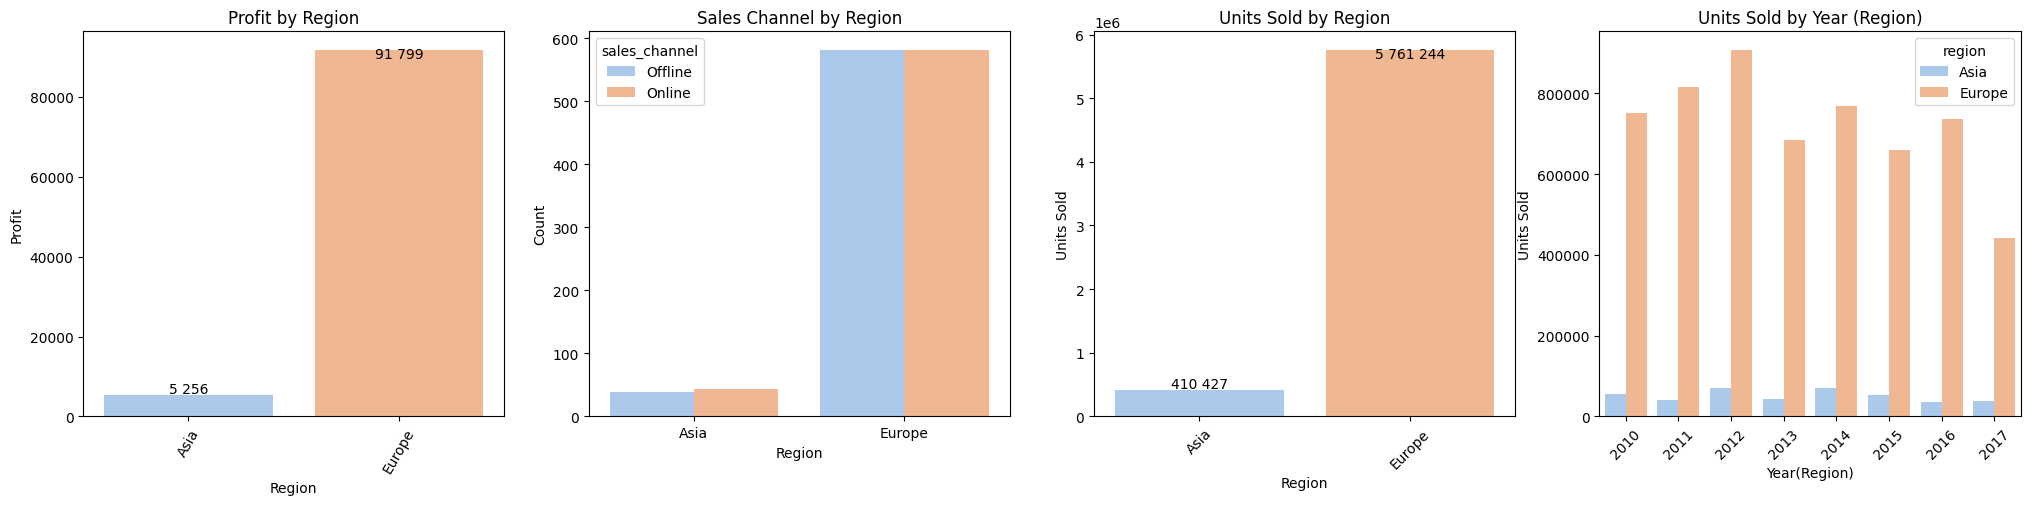

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (25, 5))
df_group = df.groupby("region", observed=False)["profit"].sum().sort_values().reset_index()
bar = sns.barplot(x="region", y="profit", data = df_group, palette="pastel", ax=ax[0])
ax[0].set_title("Profit by Region")
ax[0].set_xlabel("Region")
ax[0].set_ylabel("Profit")
for bar in ax[0].patches:
    height = bar.get_height()
    if height > 0:
        formatted_height = "{:,.0f}".format(height).replace(",", " ")
        ax[0].text(
            bar.get_x() + bar.get_width() / 2,
            height - 0.03 * height,
            formatted_height,
            ha="center",
            va="bottom",
            color="black"
        )
ax[0].tick_params(axis="x", rotation=60)

stacked_data = df.groupby(["sales_channel", "region"], observed=False).size().sort_values().reset_index(name="count")
sns.barplot(x="region", y="count", hue="sales_channel", data=stacked_data, palette="pastel", ax=ax[1])
ax[1].set_title("Sales Channel by Region")
ax[1].set_xlabel("Region")
ax[1].set_ylabel("Count")


stacked_data = df.groupby(["region"], observed=False)["units_sold"].sum().sort_values().reset_index()
bar = sns.barplot(x="region", y="units_sold", data=stacked_data, palette="pastel", ax=ax[2])
ax[2].set_title("Units Sold by Region")
ax[2].set_xlabel("Region")
ax[2].set_ylabel("Units Sold")
ax[2].tick_params(axis="x", rotation=45)
for bar in ax[2].patches:
    height = bar.get_height()
    if height > 0:
        formatted_height = "{:,.0f}".format(height).replace(",", " ")
        ax[2].text(
            bar.get_x() + bar.get_width() / 2,
            height - 0.03 * height,
            formatted_height,
            ha="center",
            va="bottom",
            color="black"
        )

df["year"] = df["order_date"].dt.year
stacked_data = df.groupby(["year", "region"])["units_sold"].sum().reset_index()
sns.barplot(x="year", y="units_sold", hue="region", data=stacked_data, palette="pastel", ax=ax[3])
ax[3].set_title("Units Sold by Year (Region)")
ax[3].set_xlabel("Year(Region)")
ax[3].set_ylabel("Units Sold")
ax[3].tick_params(axis="x", rotation=45)
plt.show()


###Графік по інтервалу часу відправки замовлень

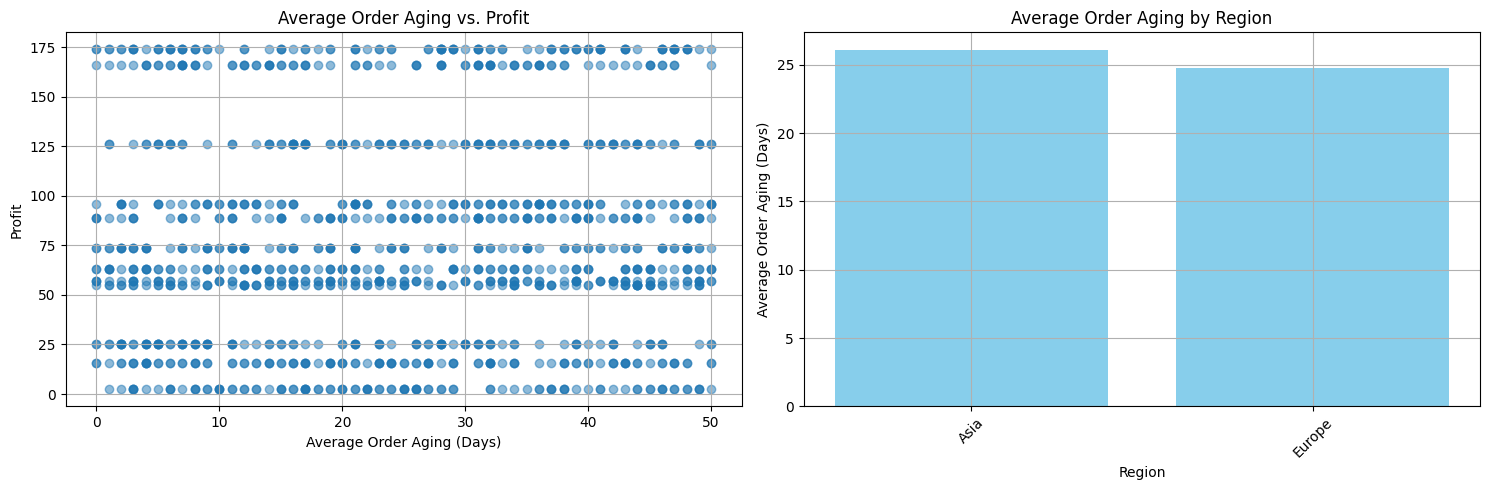

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df["ship_date"] = pd.to_datetime(df["ship_date"], errors="coerce")
df["aging"] = df["ship_date"] - df["order_date"]

avg_order_aging = df.groupby("order_id")["aging"].mean().dt.days
avg_order_aging_sales = df.groupby("order_id")["profit"].sum()
ax[0].scatter(avg_order_aging, avg_order_aging_sales, alpha=0.5)
ax[0].set_xlabel("Average Order Aging (Days)")
ax[0].set_ylabel("Profit")
ax[0].set_title("Average Order Aging vs. Profit")
ax[0].grid(True)


df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df["aging"] = (df["ship_date"] - df["order_date"]).dt.days
avg_aging_by_region = df.groupby("region")["aging"].mean().sort_values(ascending=False)
ax[1].bar(avg_aging_by_region.index, avg_aging_by_region, color="skyblue")
ax[1].set_title("Average Order Aging by Region")
ax[1].set_xlabel("Region")
ax[1].set_ylabel("Average Order Aging (Days)")
ax[1].tick_params(axis="x", rotation=45)
ax[1].grid(True)

plt.tight_layout()
plt.show()


###Звіт


* **Продажі товарів у розрізі часу**
Загалом було продано **6 171 671** товарів, середня кількість товарів у замовленні — **4953**. Продажі товарів по днях тижня не мають аномальних значень: найменші продажі були у середу, найбільші — у четвер (різниця між максимальним і мінімальним показником становить 199 974). Продажі по місяцях також не мають аномальних значень: у травні та серпні вони нижчі, ніж зазвичай, а в червні та жовтні — вищі (різниця між показниками — 227 262). Продажі по роках відносно стабільні: з 2010 по 2012 роки продажі були кращими, потім з 2013 по 2016 спостерігався спад, але у 2017 році вони знову почали зростати (різниця між показниками — 499 589). Можна помітити певну тенденцію: влітку та восени продажі дещо вищі.

* **Прибуток у розрізі часу**
Загальний прибуток склав **97 055**, середній прибуток із замовлення — **77.89**. Прибуток по днях тижня стабільний, з невеликою різницею: у п’ятницю та середу він трохи вищий, а у четвер — нижчий (різниця між показниками — 3738). Прибуток по місяцях має більш помітні коливання: з січня по серпень спостерігалася позитивна тенденція, але з серпня до грудня прибуток був нижчим (різниця між максимальним і мінімальним показником — 3740). По роках прибуток відносно стабільний, але є невеликі відхилення: у 2012 році він був найбільшим, а у 2017 — найменшим (різниця між показниками — 7800). Можна спостерігати тенденцію по місяцях: із зими до кінця літа прибуток був вищим.

* **Категорії товарів**
Загальна кількість категорій — **12**. Найбільше купували товари категорії "Office Supplies", найменше — "Household", але загальна тенденція показує, що всі товари замовляли приблизно однаково (різниця становить приблизно 10 одиниць). Найдорожча категорія — "Household" (середня ціна — 668), за нею йде "Office Supplies" (середня ціна — 651), найдешевша — "Fruits" (середня ціна — 9). По регіонах: в Азії найбільше продається категорія "Meat", на другому місці — "Snacks", найменше — "Cosmetics". У Європі найбільше купують категорії "Beverages" та "Office Supplies", найменше — "Snacks". Аномальних значень продажів категорій по регіонах немає. Показники онлайн- та офлайн-замовлень майже однакові, замовлення через обидва канали здійснювалися стабільно. Офлайн більше купували категорію "Baby Food", найменше — "Household". Онлайн частіше замовляли "Beverages", найрідше — "Baby Food".

* **Регіони**
Прибуток у Європі (**91 799**) значно перевищує прибуток в Азії (**5256**). Така ж ситуація з кількістю проданих товарів: у Європі — 5 761 244, в Азії — 410 427. Середовища, звідки надходили замовлення (онлайн чи офлайн), у обох регіонах мають приблизно однакову кількість.

* **Кількість днів до відправки замовлення**
Усе стабільно, кількість днів до відправки замовлення ніяк не впливає на прибуток. Якщо розглядати регіони, то в Азії середній час відправки замовлення трохи більший, ніж у Європі.

###Висновки
Якщо розглядати регіони, то можна зробити висновок, що Азія менш прибуткова порівняно з Європою. Варто зосередитися на регіоні з вищою кількістю замовлень, тобто на Європі.

Продажі в останні роки нижчі, ніж на початку; щось завадило їхньому зростанню, починаючи з 2013 року. Спостерігається невелика тенденція по місяцях: влітку та восени продажі вищі, але я не вважаю це сезонністю.

Середній прибуток із замовлень невеликий, тому варто переглянути цінову політику. Загальний прибуток у 97 055 дуже малий для такого тривалого часу на ринку. Є тенденція по місяцях: з початку року до кінця літа прибуток був вищим, але назвати це сезонністю складно.

Кількість категорій товару достатня, що є позитивним. Особливого зв’язку між ціною категорій і кількістю їх замовлень я не бачу. Дві найдорожчі категорії купували по-різному: "Office Supplies" замовляли більше за всі інші, а "Household" — найменше. Якщо звернути увагу на регіони, то в Азії найбільше продаються категорії "Meat" і "Snacks" — їх можна розвивати для зростання продажів у цьому регіоні. У Європі лідирують "Beverages" і "Office Supplies" — ці категорії також варто розвивати. Щодо каналів продажів, то онлайн і офлайн показники майже однакові.

Аналіз кількості днів до відправки замовлень показує стабільність. Єдиний можливий крок — спробувати зменшити час відправки для Азії, що може сприяти зростанню продажів у цьому регіоні.
